<div style="text-align: center; margin: 50px">

<h1 style="text-align: center;">Qubit by Qubit</h1>
<h2 style="text-align: center;">Introduction to Quantum Computing</h1>
<h3>Week 14 - Measurements in Multi-Qubit Circuits in Qiskit</h3>
<h3>Lab notebook</h3>

</div>

In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.save_account('')
print('Libraries imported successfully!')

configrc.store_credentials:WARNING:2022-01-29 18:15:59,378: Credentials already present. Set overwrite=True to overwrite.


Libraries imported successfully!


## Coding cheat sheet:

`qc = QuantumCircuit(2)` # Define a 2 qubit quantum circuit <br>
`qc = QuantumCircuit(2,2)` # Define a 2 qubit quantum circuit with 2 classical bit (Only for QASM simulator or real Quantum Computer) <br>

`qc.x(0)` #Add an X gate <br>
`qc.h(0)` #Add an H gate <br>
`qc.z(0)` #Add a Z gate <br>

`qc.measure([0,1],[0,1])` # Add measurement to circuit (Only for QASM simulator or real Quantum Computer) <br>

`qc.draw()` # Draw the circuit <br>


### Set up and run the statevector simulator:<br>

`backend = Aer.get_backend('statevector_simulator')` # Tell it which simulator you want to use <br>
`job = execute(qc,backend)` # Put in the name of your quantum circuit where it says qc<br>
`result = job.result()` <br>

### Set up and run the QASM simulator:<br>

`backend = Aer.get_backend('qasm_simulator')` # Tell it which simulator you want to use <br>
`job = execute(qc,backend, shots = 1024)` # Put in the name of your quantum circuit where it says qc, and the number of shots you want to use<br>
`result = job.result()` <br>

### Set up and run on a real quantum computer :<br>
`from qiskit.providers.ibmq import least_busy` <br>
`backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and` <br>
                                        `not x.configuration().simulator and x.status().operational==True))` # Find the least busy QC <br>

`job = execute(qc,backend, shots = 1024)` # Put in the name of your quantum circuit where it says qc, and the number of shots you want to use<br>
`result = job.result()` <br>


### See the output in vector form (only for Statevector simulator):<br>
`state = result.get_statevector()` <br>
`array_to_latex(state, prefix="\\text{Statevector} = ")` <br>

### See the output in histogram form (for Statevector, QASM, or real quantum computer): <br>
`counts = result.get_counts()` <br>
`plot_histogram(counts)` <br>



In [7]:
# Block 1: Create a quantum circuit with 2 qubits and 2 classical bits. 
# Add an H gate to qubit 0, and an X gate to qubit 1.
qc = QuantumCircuit(2,2)
qc.h(0)
qc.x(1)

In [8]:
# Block 2: Add measurements to the circuit using qc.measure([0,1],[0,1]) and draw it.
qc.measure([0,1],[0,1])
qc.draw()

┌───┐┌─┐   
q_0: ┤ H ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1

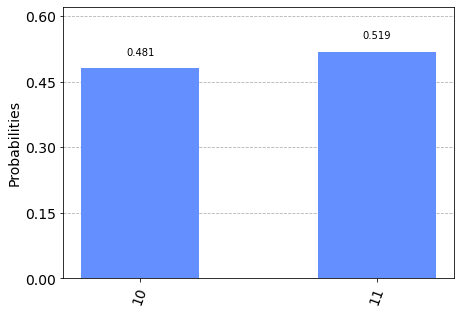

In [10]:
# Block 3: Simulate the circuit using the QASM simulator and plot the histogram. 
# Feel free to copy code from the cheat sheet!
backend = Aer.get_backend('qasm_simulator') # Tell it which simulator you want to use
job = execute(qc,backend, shots = 1024) # Put in the name of your quantum circuit where it says qc, and the number of shots you want to use
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [11]:
# Block 4: Block 4: Create a quantum circuit with 2 qubits and 2 classical bits. 
# Add an H gate to qubit 0 and an CX gate with qubit 0 as control and qubit 1 as target. 
# Add measurements to the circuit. Draw the circuit.
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

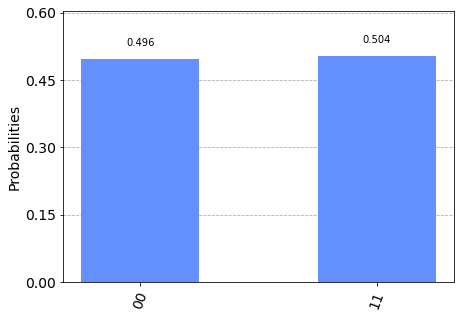

In [12]:
# Block 5: Simulate the circuit using the QASM simulator and plot the histogram. 
# Feel free to copy code from the cheat sheet!
backend = Aer.get_backend('qasm_simulator') # Tell it which simulator you want to use
job = execute(qc,backend, shots = 1024) # Put in the name of your quantum circuit where it says qc, and the number of shots you want to use
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [16]:
# Block 6: Run this block to find the least busy quantum computer. 
# Which system did you get?
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                        not x.configuration().simulator and x.status().operational==True))
print(backend)

AttributeError: 'NoneType' object has no attribute 'backends'

In [17]:
# Block 7: Run the circuit using the least busy QC and plot the histogram. 
# Feel free to copy code from the cheat sheet!
job = execute(qc,backend, shots = 1024) # Put in the name of your quantum circuit where it says qc, and the number of shots you want to use
result = job.result()

In [28]:
# Optional Block 1: Create a quantum circuit with 3 qubits and 3 classical bits. Add an H gate to qubit 0. 
# Add a CX gate with qubit 0 as control and 1 as target. 
# Add another CX with qubit 1 as control and 2 as target. 
# Add measurements to all 3 qubits and draw the circuit.
qc = QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.measure([0,2],[0,2])
qc.draw()

┌───┐          ┌─┐   
q_0: ┤ H ├──■───────┤M├───
     └───┘┌─┴─┐     └╥┘   
q_1: ─────┤ X ├──■───╫────
          └───┘┌─┴─┐ ║ ┌─┐
q_2: ──────────┤ X ├─╫─┤M├
               └───┘ ║ └╥┘
c: 3/════════════════╩══╩═
                     0  2

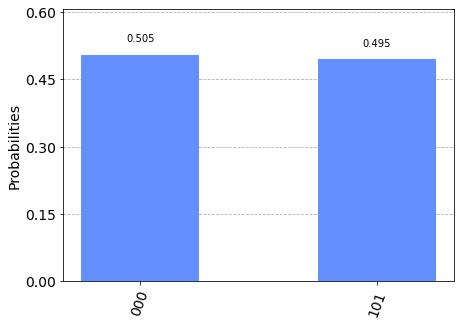

In [29]:
# Optional Block 2: Simulate this circuit using the QASM simulator and plot the histogram. 
# What final state do you get?
backend = Aer.get_backend('qasm_simulator') # Tell it which simulator you want to use
job = execute(qc,backend, shots = 1024) # Put in the name of your quantum circuit where it says qc, and the number of shots you want to use
result = job.result()
counts = result.get_counts()
plot_histogram(counts)